In [1]:
import itertools
import copy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
%matplotlib inline
import PIL.Image as Image
from os import *
from os.path import *

In [2]:
mypath = "database/"
data_name = [f for f in listdir(mypath) if isfile(join(mypath, f)) and ".pgm" in f]
data = {}
curr_id = 0
classe_of_id = {}
id_of_classe = {}
for f in data_name:
    print("Processing", f)
    img = Image.open(mypath+f)
    classe_name = f.split("-")[0]
    if not classe_name in id_of_classe:
        id_of_classe[classe_name] = curr_id
        classe_of_id[curr_id] = classe_name
        curr_id += 1
    the_id = id_of_classe[classe_name]
    if not the_id in data:
        data[the_id] = []
    data[the_id].append((f,img,np.array(list(img.getdata())).reshape((img.height,img.width))))

Processing spring-2.pgm
Processing device9-20.pgm
Processing teddy-7.pgm
Processing device6-9.pgm
Processing lmfish-18.pgm
Processing device4-5.pgm
Processing tree-3.pgm
Processing device1-6.pgm
Processing cup-1.pgm
Processing bird-5.pgm
Processing sea_snake-8.pgm
Processing device9-18.pgm
Processing octopus-1.pgm
Processing Heart-1.pgm
Processing apple-2.pgm
Processing apple-6.pgm
Processing bell-7.pgm
Processing truck-7.pgm
Processing Glas-7.pgm
Processing cellular_phone-9.pgm
Processing device9-3.pgm
Processing truck-1.pgm
Processing personal_car-1.pgm
Processing beetle-10.pgm
Processing chopper-3.pgm
Processing lmfish-16.pgm
Processing hat-3.pgm
Processing device7-3.pgm
Processing HCircle-3.pgm
Processing sea_snake-6.pgm
Processing beetle-16.pgm
Processing HCircle-2.pgm
Processing bat-6.pgm
Processing Comma-3.pgm
Processing Bone-2.pgm
Processing brick-9.pgm
Processing lizzard-6.pgm
Processing device4-16.pgm
Processing jar-4.pgm
Processing lizzard-8.pgm
Processing device0-8.pgm
Proc

In [12]:
classe_of_id

{0: 'spring',
 1: 'device9',
 2: 'teddy',
 3: 'device6',
 4: 'lmfish',
 5: 'device4',
 6: 'tree',
 7: 'device1',
 8: 'cup',
 9: 'bird',
 10: 'sea_snake',
 11: 'octopus',
 12: 'Heart',
 13: 'apple',
 14: 'bell',
 15: 'truck',
 16: 'Glas',
 17: 'cellular_phone',
 18: 'personal_car',
 19: 'beetle',
 20: 'chopper',
 21: 'hat',
 22: 'device7',
 23: 'HCircle',
 24: 'bat',
 25: 'Comma',
 26: 'Bone',
 27: 'brick',
 28: 'lizzard',
 29: 'jar',
 30: 'device0',
 31: 'rat',
 32: 'carriage',
 33: 'ray',
 34: 'butterfly',
 35: 'device2',
 36: 'key',
 37: 'cattle',
 38: 'flatfish',
 39: 'fountain',
 40: 'deer',
 41: 'horseshoe',
 42: 'device8',
 43: 'spoon',
 44: 'horse',
 45: 'fish',
 46: 'device5',
 47: 'dog',
 48: 'crown',
 49: 'guitar',
 50: 'pencil',
 51: 'device3',
 52: 'elephant',
 53: 'shoe',
 54: 'Misk',
 55: 'fork',
 56: 'car',
 57: 'stef',
 58: 'camel',
 59: 'chicken',
 60: 'pocket',
 61: 'frog',
 62: 'turtle',
 63: 'children',
 64: 'hammer',
 65: 'watch',
 66: 'bottle',
 67: 'classic',
 68

In [13]:
data[24][0][1].thumbnail((100,100))

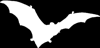

In [18]:
data[24][0][1]

In [41]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

OSError: [Errno 24] Too many open files: '/usr/lib/python3.6/site-packages/sklearn/neural_network/__init__.py'

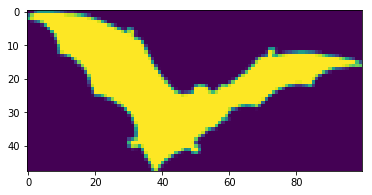

In [35]:
img = np.asarray(data[24][0][1])
plt.imshow(img)

In [36]:
X=np.argwhere(img >= 0.0)
y=(img == 0).flatten()
X_scaled = StandardScaler().fit_transform(X)

/usr/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
clf.

In [39]:
sk_stump = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(sk_stump,n_estimators=200)
ada.fit(X,y)
print(ada.score(X,y))

0.726041666667


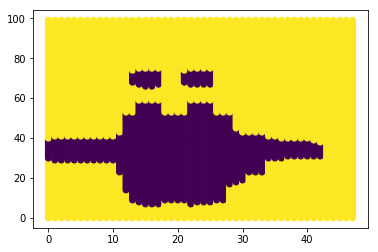

In [40]:
prediction = ada.predict(X)
#print(prediction)
plt.scatter(X[:,0],X[:,1],c=prediction)
plt.show()

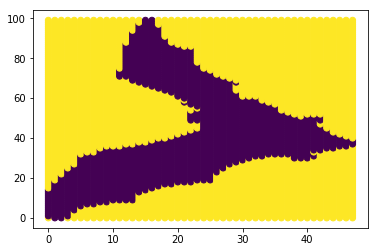

In [34]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
for proc in psutil.process_iter():
    try:
        print(proc.open_files())
        for f in proc.open_files():
            if ".pgm" in f.path:
                print(proc.open_files())
                break
    except psutil.AccessDenied:
        continue

[popenfile(path='/proc/454/mountinfo', fd=10, position=0, mode='r', flags=557056), popenfile(path='/proc/swaps', fd=12, position=100, mode='r', flags=557056)]
[]
[popenfile(path='/usr/bin/startx', fd=255, position=5155, mode='r', flags=557056)]
[]
[popenfile(path='/home/cosmo/.local/share/xorg/Xorg.1.log', fd=4, position=24766, mode='w', flags=32769)]
[popenfile(path='/home/cosmo/.xinitrc', fd=255, position=11, mode='r', flags=557056)]
[popenfile(path='/etc/xdg/xfce4/xinitrc', fd=255, position=3549, mode='r', flags=557056)]
[popenfile(path='/home/cosmo/.xfce4-session.verbose-log', fd=11, position=11880, mode='w', flags=32769)]
[]
[]
[]
[]
[]
[]
[popenfile(path='/home/cosmo/.local/share/gvfs-metadata/home', fd=11, position=0, mode='r', flags=32768), popenfile(path='/home/cosmo/.local/share/gvfs-metadata/home-61744cf3.log', fd=12, position=0, mode='r', flags=32768), popenfile(path='/home/cosmo/.local/share/gvfs-metadata/root', fd=15, position=0, mode='r', flags=32768), popenfile(path='/h

In [6]:
f = open("lol.pgm","w")

In [2]:
import psutil